<center>
    <u><font size="36">Partial Differential Equations</font></u>
    <h3>∙ elliptic, parabolic, & hyperbolic solution methods ∙</h3>
    <h2>Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

---
---

In [15]:
# Import numerical computation libraries
import math
import numpy as np
import scipy as sp

# Import graphic libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set back-end display options
np.set_printoptions(precision = 4)

<center><br>Questions are from <br><i>Numerical Analysis, $10^{th}$ edition</i> by Burden, Faires, Burden</center>

---
<center><h2>Problem Set 12.1:  Question 3c</h3></center><br>

Approximate the solutions to the following elliptic partial differential equation, using Algorithm 12.1:
$$
\begin{align*}
\frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2} = (x^2 + y^2) e^{xy}, \ \ \ \ \ \  0 < x < 2, 0 < y < 1: \\
u(0,y)=1, \ \ u(2,y)=e^{2y}, \ \ \ 0 \leq y \leq 1; \\
u(x,0)=1, \ \ u(x,1)=e^x, \ \ \ 0 \leq x \leq 2. \\
\end{align*}
$$
Use $h=k=0.1$ and compare the results to the actual solution  $u(x,y)=e^{xy}$.
<br><br>

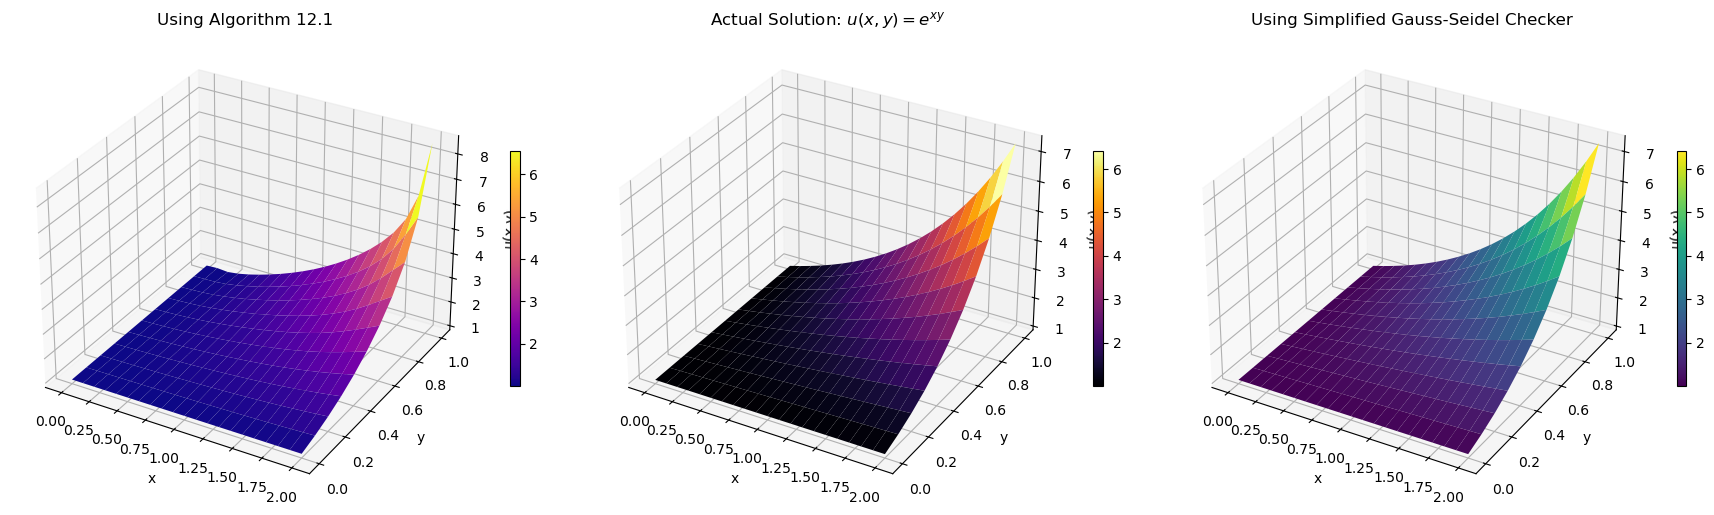

In [17]:
## FUNCTIONS TO SOLVE POISSON EQUATION WITH FINITE-DIFFERENCE METHOD
'''
    grid = (int(nx), int(ny)) : nx, ny qty of mesh points in x, y directions respectively
    hk = int(%) : percentage indicating increment size of the grid
    bv = [[a, b, c, d]] : boundary conditions a <= x <= b, c <= y <= d
'''
def multivar_poly_bvp_solver(bv, hk=0.1, tol=1e-6, max_iter=10000):
    
    # Define grid spaces
    xStart, xEnd = bv[0,0], bv[0,1]          # a <= x <= b
    yStart, yEnd = bv[1,0], bv[1,1]          # c <= y <= d
    h, k = hk, hk                            # increments: h ~ x_i, k ~ y_j
    nx, ny = int((xEnd - xStart) / h) + 1, int((yEnd - yStart) / k) + 1  # spacing
    x, y = np.linspace(xStart, xEnd, nx), np.linspace(yStart, yEnd, ny)  # build mesh
    lam = h**2 / k**2
    mu = 2 + 2*lam
    
    # Define the function, its boundary conditions, and instantiate the transformation matrix
    def f(x, y): return (x**2 + y**2)*np.exp(x*y)      # <--- non-homogeneous elliptical PDE
    def g(x, y):                                       # boundary condition parameters for `u`
        if x == xStart: return 1
        elif x == xEnd: return np.exp(2*y)
        elif y == yStart: return 1
        elif y == yEnd: return np.exp(x)
        else: return 0
    w = np.zeros((nx, ny))                             # matrix Phi to hold approximation values
    for j in range(ny):                                # place constraints around matrix Phi
        w[0,j] = g(xStart, y[j])
        w[-1,j] = g(xEnd, y[j])
    for i in range(nx):
        w[i,0] = g(x[i], yStart)
        w[i,-1] = g(x[i], yEnd)
    
    # Algorithm 12.1 from the textbook (Gauss-Seidel iteration)
    # J:Φ_{i-1,j}^(n) → GS:Φ_{i-1,j}^(n+1) and J:Φ_{i,j-1}^(n) → GS:Φ_{i,j-1}^(n+1)
    iter_count = int(1)
    while iter_count <= max_iter:
        z = (-h**2*f(x[1],y[-1]) + g(xStart,y[-1]) + lam*g(x[1],yEnd) + lam*w[1,-2] + w[2,-1]) / mu
        NORM = np.abs(z - w[1,ny-1])
        w[1,-1] = z
        for i in range(2, nx-1):
            z = (-h**2*f(x[-1],y[-1]) + lam*g(x[i],yEnd) + w[i-1,-1] + w[i+1,-1] + lam*w[i,-2]) / mu
            if np.abs(w[i,-1] - z) > NORM: NORM = np.abs(w[i,-1] - z); w[i,-1] = z  # check if indentation is ok
            z = (-h**2*f(x[-1],y[-1]) + g(xEnd,y[-1]) + lam*g(x[-1],y[-1]) + lam*g(x[-1],yEnd) + w[-2,-1] + lam*w[-1,-2]) / mu
            if np.abs(w[-1,-1] - z) > NORM: NORM = np.abs(w[-1,-1] - z); w[-1,-1] = z
        for j in range(ny-2, 1, -1):  # check if 'stop' should be 1 or 2
            z = (-h**2*f(x[1],y[j]) + g(xStart,y[j]) + lam*w[1,j+1] + lam*w[1,j-1] + w[2,j]) / mu
            if np.abs(w[1,j] - z) > NORM: NORM = np.abs(w[1,j] - z); w[1,j] = z
            for i in range(2, nx-1):
                z = (-h**2*f(x[i],y[j]) + w[i-1,j] + lam*w[i,j+1] + w[i+1,j] + lam*w[i,j-1]) / mu
                if np.abs(w[i,j] - z) > NORM: NORM = np.abs(w[i,j] - z); w[i,j] = z
            z = (-h**2*f(x[-1],y[j]) + g(xEnd,y[j]) + w[-2,j] + lam*w[-1,j+1] + lam*w[-1,j-1]) / mu
            if np.abs(w[-1,j] - z) > NORM: NORM = np.abs(w[-1,j] - z); w[-1,j] = z
        z = (-h**2*f(x[1],y[1]) + g(xStart,y[1]) + lam*g(x[1],yStart) + lam*w[1,2] + w[2,1]) / mu
        if np.abs(w[1,1] - z) > NORM: NORM = np.abs(w[1,1] - z); w[1,1] = z
        for i in range(2, nx-1):
            z = (-h**2*f(x[i],y[1]) + lam*g(x[i],yStart) + w[i-1,1] + lam*w[i,2] + w[i+1,1]) / mu
            if np.abs(w[i,1] - z) > NORM: NORM = np.abs(w[i,1] - z); w[i,1] = z
        z = (-h**2*f(x[-1],y[1]) + g(xEnd,y[1]) + lam*g(x[-1],yStart) + w[-2,1] + lam*w[-1,2]) / mu
        if np.abs(w[-1,1] - z) > NORM: NORM = np.abs(w[-1,1] - z); w[-1,1] = z
        if NORM <= tol:
            for i in range(1, nx):
                for j in range(1, ny):
                    # return x[i], y[j], w[i,j]   # not sure why book has it this way?
                    return x, y, w
        iter_count += 1
        if iter_count==max_iter: print("\nMaximum number of iterations reached before convergence\n")

    return None, None, None
##
## CONFIRMATION FUNCTION TO CHECK BVP SOLVER
def solver_check(bv, hk=0.1, tol=1e-6, max_iter=10000):

    # Define grid spaces
    xStart, xEnd = bv[0,0], bv[0,1]          # a <= x <= b
    yStart, yEnd = bv[1,0], bv[1,1]          # c <= y <= d
    h, k = hk, hk                            # increments: h ~ x_i, k ~ y_j
    nx, ny = int((xEnd - xStart) / h) + 1, int((yEnd - yStart) / k) + 1  # spacing
    x, y = np.linspace(xStart, xEnd, nx), np.linspace(yStart, yEnd, ny)  # build mesh
    lam = h**2 / k**2
    mu = 2 + 2*lam

    # Define the function, its boundary conditions, and instantiate the transformation matrix   
    f = lambda x, y: (x**2 + y**2) * np.exp(x*y)      # elliptical equation   
    w = np.zeros((nx, ny))                            # solution matrix    
    for j in range(ny):                               # boundary conditions
        w[0,j] = 1
        w[-1,j] = np.exp(2*y[j])
    for i in range(nx):
        w[i,0] = 1
        w[i,-1] = np.exp(x[i])
    
    # Simplified Gauss-Seidel iteration
    for _ in range(max_iter):
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                w[i, j] = (w[i+1,j] + w[i-1,j] + lam * (w[i,j+1] + w[i,j-1]) - h**2 * f(x[i], y[j])) / mu

    return x, y, w
##
##
## PROVIDED PARAMETERS
def exact_solution(x, y): return np.exp(np.outer(x,y))
bounds = np.array([[0.0, 2.0],               # left boundary:  a <= x <= b
                   [0.0, 1.0]])              # right boundary: c <= y <= d
hk, N, TOL = 0.1, 10000, 1e-14               # stepper & stoppers
##
##
## ANSWER THE QUESTION
x1, y1, Phi1 = multivar_poly_bvp_solver(bounds, hk=hk, tol=TOL, max_iter=N)
x2, y2, Phi2 = solver_check(bounds, hk=hk, max_iter=N)
x_exact, y_exact = np.linspace(0, 2, int(2/hk) + 1), np.linspace(0, 1, int(1/hk) + 1)
Phi_exact = exact_solution(x_exact, y_exact)
#
# Plot the Solution
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131, projection='3d')
X1, Y1 = np.meshgrid(x1, y1)
surf1 = ax1.plot_surface(X1, Y1, Phi1.T, cmap='plasma')
ax1.set_title('Using Algorithm 12.1')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u(x,y)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=25)
ax2 = fig.add_subplot(132, projection='3d')
X_exact, Y_exact = np.meshgrid(x_exact, y_exact)
surf2 = ax2.plot_surface(X_exact, Y_exact, Phi_exact.T, cmap='inferno')
ax2.set_title('Actual Solution: $u(x,y) = e^{xy}$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u(x,y)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=25)
ax3 = fig.add_subplot(133, projection='3d')
X2, Y2 = np.meshgrid(x2, y2)
surf3 = ax3.plot_surface(X2, Y2, Phi2.T, cmap='viridis')
ax3.set_title('Using Simplified Gauss-Seidel Checker')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('u(x,y)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=25)
plt.tight_layout()
plt.show();

<center><hr style="width: 50%; border-color: black;"></center><br>

Due to the erratic nature of the actual solution $u(x,y)$ as it nears the origin (due to $ln(xy)$), the actual solution will not plot for us in the given boundary range, which includes the origin. However the Gauss-Seidel method using finite difference approximations as outlined in the textbook's Algorithm 12.1 worked great! It's even more robust (read: more elliptical) than our simplistic `checker` code. Note: we had to settle on a simplified checker version because everything else we tried from SciPy's library had equal fates of dead-in-the-water. Another note: we also had to increase our iterations to get this slower-performance Gauss-Seidel iterative method to work. Though the computational power was much more costly, we know from class that it's due to the instability of the data (which we know objectively from the equation: $ln 0$ is undefined). If we didn't have the benefit of knowing the actual solution, we could deduce this behavior to be signatory of unstable fixed points, but <i>still</i> arrive at a well-approximated solution in spite of the noise in the data. This experiment demonstrates the power of the Gauss-Seidel method!
<center><hr style="width: 50%; border-color: black;"></center><br>

---
<center><h2>Problem Set 12.2:  Question 6a</h3></center><br>

Use the <b>Forward-Difference</b> method to approximate the solution to the following parabolic partial differential equation.
$$
\begin{align*}
\frac{\delta u}{\delta t} - \frac{4}{\pi^2} \frac{\delta^2 u}{\delta x^2} = 0, \ \ \ \ \ \  0 < x < 4, 0 < t: \\
u(0,t) = u(4,t) = 0, \ \ \ 0 <t; \\
u(x,0) = sin \frac{\pi}{4} x (1 + 2 cos \frac{\pi}{4} x), \ \ \ 0 \leq x \leq 4. \\
\end{align*}
$$
Use $h=0.2$ and $k=0.04$ and compare your results at $t=0.4$ to the actual solution  $u(x,t) = e^{-t} sin \frac{\pi}{2} x + e^{- \frac{t}{4}} sin \frac{\pi}{4} x$.

Stability condition met: True
Lambda value: 0.40528473456935105



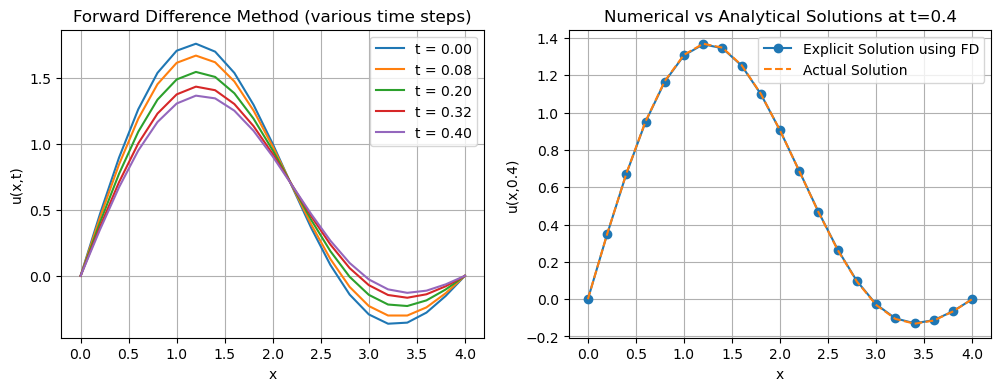

In [54]:
## FORWARD-DIFFERENCE APPROXIMATION (the Forward Time-Centered Spatial Scheme / the Crank-Nicholson Method)
''' w[i, j+1] = (1 - 2 * lam**2) * w[i,j] + lam**2 * (w[i+1, j] + w[i-1, j])
    lam = np.sqrt((alpha**2 * k) / h**2)
    alpha = the diffusion coefficient 'D'
    0 < lam**2 < (1/2) = stability condition
'''
# Parameters
h, k, T = 0.2, 0.04, 0.4
alpha = 4/np.pi**2          
Lx = 4                      

# Compute lambda
lam = np.sqrt((alpha**2 * k) / h**2)

# Grid space
Nx, Nt = int(Lx/h) + 1, int(T/k) + 1
x, t = np.linspace(0, Lx, Nx), np.linspace(0, T, Nt)

# Initialize solution matrix & implement initial condition
w = np.zeros((Nx, Nt))                                # u(0,t) == u(4,t)
w[:,0] = np.sin(np.pi/4 * x) * (1 + 2 * np.cos(np.pi/4 * x))  # u(x,0)

# Time-stepping using the Forward-Difference scheme
for j in range(Nt-1):
    for i in range(1, Nx-1):
        w[i,j+1] = w[i,j] + lam * (w[i+1,j] - 2*w[i,j] + w[i-1,j])
    w[0, j+1] = 0  
    w[-1, j+1] = 0  

# Stability check
stability_condition = 0 < lam < 0.5
print('Stability condition met:', stability_condition)
print('Lambda value:', lam)
print()

## COMPARE THE SOLUTIONS
def actual_solution(x, t):
    return np.exp(-t) * np.sin(np.pi/2 * x) + np.exp(-t/4) * np.sin(np.pi/4 * x)

# Visualization
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
time_steps = [0, int(Nt/4), int(Nt/2), int(3*Nt/4), Nt-1]
for t_idx in time_steps:
    ax1.plot(x, w[:, t_idx], label=f"t = {t[t_idx]:.2f}")
ax1.set_title("Forward Difference Method (various time steps)")
ax1.set_xlabel("x")
ax1.set_ylabel("u(x,t)")
ax1.legend()
ax1.grid(True)
ax2.plot(x, w[:, -1], label="Explicit Solution using FD", marker='o', linestyle='-')
ax2.plot(x, actual_solution(x,T), label="Actual Solution", linestyle='--')
ax2.set_title("Numerical vs Analytical Solutions at t=0.4")
ax2.set_xlabel("x")
ax2.set_ylabel("u(x,0.4)")
ax2.legend()
ax2.grid(True)
plt.show();

<center><hr style="width: 50%; border-color: black;"></center><br>
The first FDM plot demonstrates the volatility of the convergence even within the constraints of lambda $\lambda$. It does give us a great approximation of the Actual Solution, however, as we see in the second graph.
<center><hr style="width: 50%; border-color: black;"></center><br>

---
<center><h2>Problem Set 12.2:  Question 8a</h3></center><br>

Use the <b>Backward-Difference</b> method to approximate the solution to the following parabolic partial differential equation.
$$
\begin{align*}
\frac{\delta u}{\delta t} - \frac{4}{\pi^2} \frac{\delta^2 u}{\delta x^2} = 0, \ \ \ \ \ \  0 < x < 4, 0 < t: \\
u(0,t) = u(4,t) = 0, \ \ \ 0 <t; \\
u(x,0) = sin \frac{\pi}{4} x (1 + 2 cos \frac{\pi}{4} x), \ \ \ 0 \leq x \leq 4. \\
\end{align*}
$$
Use $h=0.2$ and $k=0.04$ and compare your results at $t=0.4$ to the actual solution  $u(x,t) = e^{-t} sin \frac{\pi}{2} x + e^{- \frac{t}{4}} sin \frac{\pi}{4} x$.
<br><br>

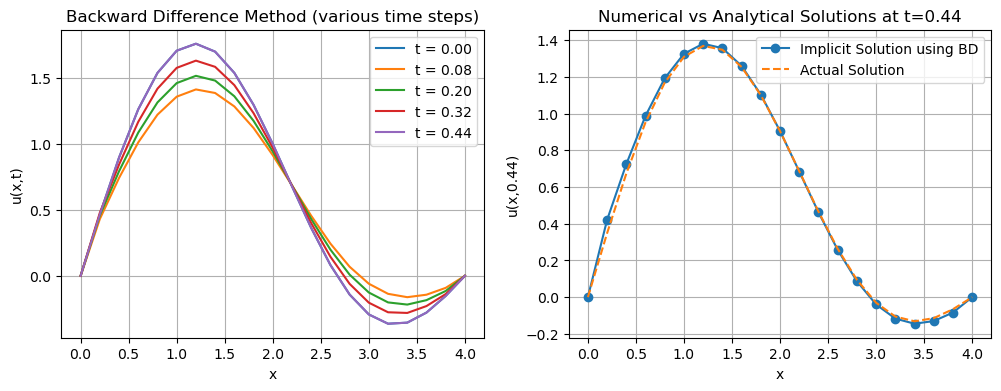

In [56]:
## BACKWARD-DIFFERENCE APPROXIMATION (the Crout Factorization Method)
''' B @ w[j] = w[j-1] where B is tridiagonal matrix
    main_diagonal = 1 + 2 * lam; offset_diagonals = -lam**2
    lam = alpha**2 * k / h**2
    alpha = the diffusion coefficient 'D'
'''
# Define the backward-difference method function 
def crout_factorization(a, b, c, d):  # LU decomposition
    n = len(d)
    c_, d_ = np.zeros(n-1), np.zeros(n)
    
    # Forward sweep (decomposition)
    c_[0], d_[0] = c[0] / b[0], d[0] / b[0]
    for i in range(1, n-1):
        denom = b[i] - a[i-1] * c_[i-1]
        c_[i] = c[i] / denom
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / denom
    d_[n-1] = (d[n-1] - a[n-2] * d_[n-2]) / (b[n-1] - a[n-2] * c_[n-2])
    
    # Backward substitution
    x = np.zeros(n)
    x[n-1] = d_[n-1]
    for i in range(n-2, -1, -1):  # backstep
        x[i] = d_[i] - c_[i] * x[i+1]
    return x
    
# Define the backward-difference method function 
def SOR_solver(M, b, omega=1.5, tol=1e-8, max_iter=10000): # Jacobi + Gaussian
    x = np.zeros_like(b)
    n_iter = 0
    NORM = np.linalg.norm(M @ x - b)
    while NORM > tol and n_iter < max_iter:
        x_new = np.copy(x)
        for i in range(M.shape[0]):
            dummy = b[i]
            for j in range(M.shape[1]):
                if i != j:
                    dummy -= M[i][j] * x_new[j]
            x_new[i] = (1 - omega) * x_new[i] + (omega / A[i][i]) * dummy
        NORM = np.linalg.norm(M @ x_new - b)
        n_iter += 1
        x = x_new
    return x

# Parameters
h, k, T = 0.2, 0.04, 0.4
alpha = 4/np.pi**2          
Lx = 4                      

# Compute lambda
lam = np.sqrt((alpha**2 * k) / h**2)

# Grid space      
Nx, Nt = int(Lx/h) + 1, int(T/k) + 1
x = np.linspace(0, Lx, Nx)  

# Initialize solution matrix & implement initial condition
v = np.zeros((Nx, int(T/k) + 1))
v[:,0] = np.sin(np.pi/4 * x) * (1 + 2 * np.cos(np.pi/4 * x))

# Create the transformation matrix A
main_diag, off_diag = (1 + 2*lam) * np.ones(Nx), -lam * np.ones(Nx-1)
A = np.diag(main_diag, 0) + np.diag(off_diag, -1) + np.diag(off_diag, 1)

# Time-stepping using the Backward-Difference Method
for j in range(1, Nt):  # using SOR (Gaussian) relaxation
    v[:,j] = SOR_solver(A, v[:,j-1])
    v[0,j] = 0  # boundary condition
    v[-1,j] = 0  # boundary condition
# for j in range(1, Nt):  # using Crout (LU) factorization
#     rhs = v[:,j-1]
#     v[1:-1, j] = crout_factorization(off_diag,  # a
#                                      main_diag, # b
#                                      off_diag,  # c
#                                      rhs)       # d
#     v[0,j] = v[-1,j] = 0  # boundaries

## COMPARE THE SOLUTIONS
def actual_solution(x, t):
    return np.exp(-t) * np.sin(np.pi/2 * x) + np.exp(-t/4) * np.sin(np.pi/4 * x)
actual_parabola = actual_solution(x, T)

# Visualization
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
time_steps = [0, int(Nt/4), int(Nt/2), int(3*Nt/4), Nt]
for t_idx in time_steps:
    ax1.plot(x, v[:,-t_idx], label=f"t = {k*t_idx:.2f}")
ax1.set_title("Backward Difference Method (various time steps)")
ax1.set_xlabel("x")
ax1.set_ylabel("u(x,t)")
ax1.legend()
ax1.grid(True)
ax2.plot(x, v[:,-1], label="Implicit Solution using BD", marker='o', linestyle='-')
ax2.plot(x, actual_parabola, label="Actual Solution", linestyle='--')
ax2.set_title("Numerical vs Analytical Solutions at t=0.44")
ax2.set_xlabel("x")
ax2.set_ylabel("u(x,0.44)")
ax2.legend()
ax2.grid(True)
plt.show();

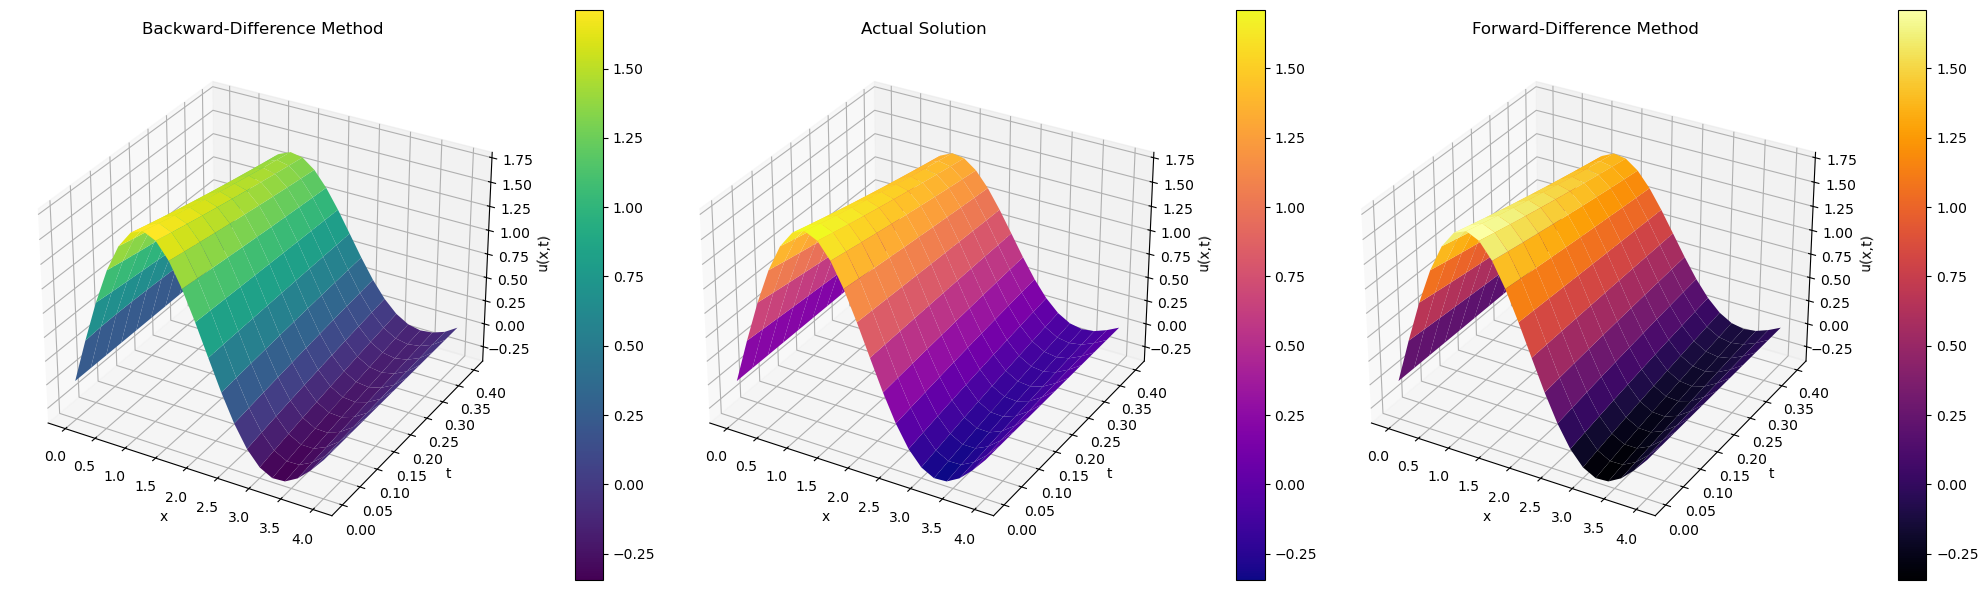

In [51]:
## VISUALIZE THE SOLUTIONS
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(20, 6))
#
# Backward-Difference Method
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X, T, v.T, cmap='viridis', edgecolor='none')
ax1.set_title('Backward-Difference Method')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
fig.colorbar(surf1, ax=ax1, fraction=0.05, pad=0.1)
#
# Actual Solution
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, T, u0, cmap='plasma', edgecolor='none')
ax2.set_title('Actual Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x,t)')
fig.colorbar(surf2, ax=ax2, fraction=0.05, pad=0.1)
#
# Forward-Difference Method
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(X, T, w.T, cmap='inferno', edgecolor='none')
ax3.set_title('Forward-Difference Method')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('u(x,t)')
fig.colorbar(surf3, ax=ax3, fraction=0.05, pad=0.1)
#
plt.tight_layout()
plt.show();

<center><hr style="width: 50%; border-color: black;"></center><br>

This has been a pretty cool investigation into the nature of stability conditions in numerical methods. The stability condition determines whether truncation errors in the numerical (discretized) solution will grow or decay with time. The closer we can get to the actual solution, the more real-to-life our numerical solution becomes. The forward difference (explicit) method was pretty simple and, given our boundaries, arrived at a good approximation fairly quickly, without much computational effort. The problem with the explicit method is that it's conditionally stable- it's reliable as long as our steps are small and our constraints are reachable. The implicit (backward difference) method is unconditionally stable regardless of the step size, but requires a solution to a system of equations per calculation of each point, making it computationally exhausting. To demonstrate this, we include this last pair of graphs to visualize the stability condition for $\lambda$ as the number of `h` steps increases.

<center><hr style="width: 50%; border-color: black;"></center><br>

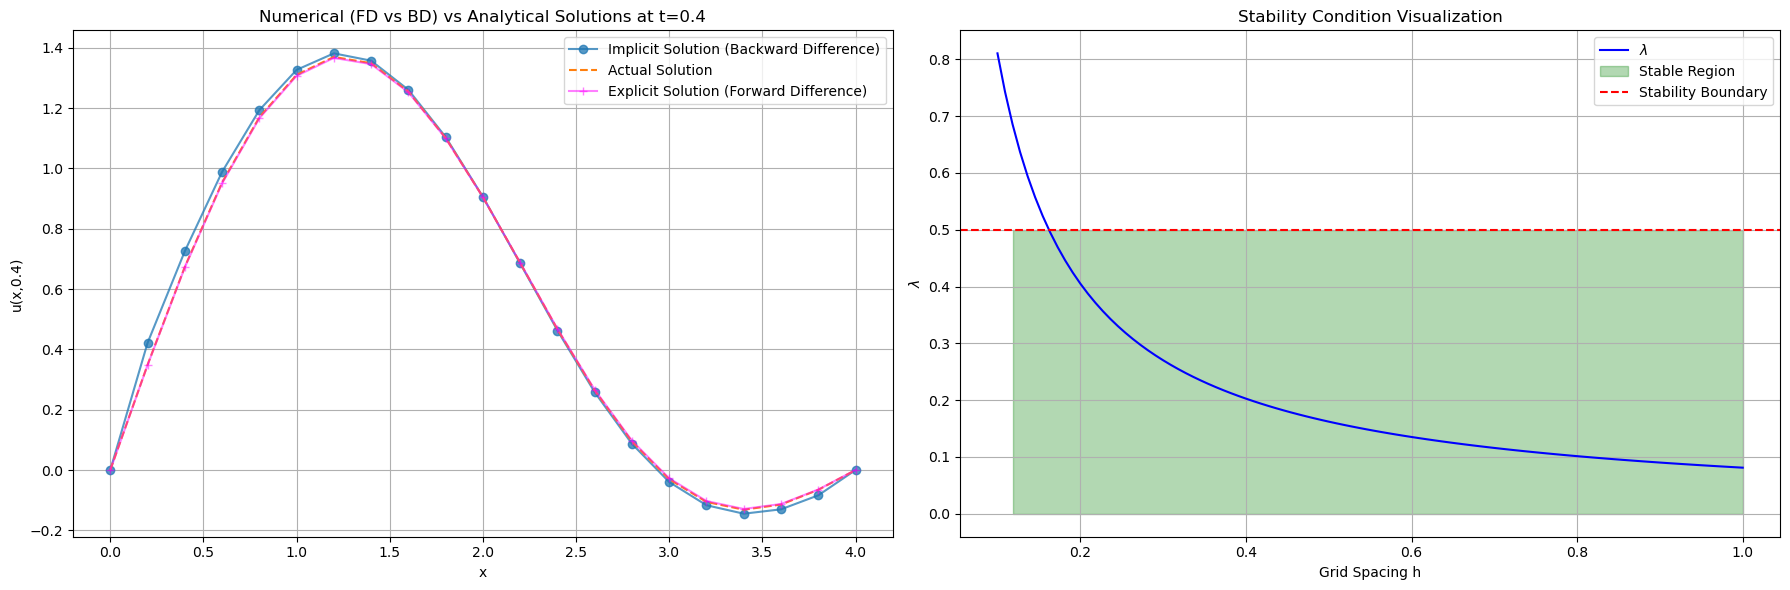

In [57]:
## COMPARE ALL SOLUTIONS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot numerical and analytical solutions
ax1.plot(x, v[:, -1], label="Implicit Solution (Backward Difference)", marker='o', linestyle='-', alpha=0.75)
ax1.plot(x, actual_parabola, label="Actual Solution", linestyle='--')
ax1.plot(x, w[:, -1], label="Explicit Solution (Forward Difference)", marker='+', linestyle='-', color='magenta', alpha=0.5)
ax1.set_title("Numerical (FD vs BD) vs Analytical Solutions at t=0.4")
ax1.set_xlabel("x")
ax1.set_ylabel("u(x,0.4)")
ax1.legend()
ax1.grid(True)

# Visualization of the Stability Condition
h_values = np.linspace(0.1, 1, 100)
lam_values = np.sqrt((alpha**2 * k) / h_values**2)
stable = (0 < lam_values**2) & (lam_values**2 < 0.5)

ax2.plot(h_values, lam_values, label=r'$\lambda$', color='blue')
ax2.fill_between(h_values, 0, 0.5, where=stable, color='green', alpha=0.3, label='Stable Region')
ax2.axhline(0.5, color='red', linestyle='--', label='Stability Boundary')
ax2.set_title('Stability Condition Visualization')
ax2.set_xlabel('Grid Spacing h')
ax2.set_ylabel(r'$\lambda$')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show();

---
<center><h2>Problem Set 12.3:  Question 3</h3></center><br>

Approximate the solution to the wave equation
$$
\begin{align*}
\frac{\delta^2 u}{\delta t^2} - \frac{\delta^2 u}{\delta x^2} = 0, \ \ \ \ \ \  0 < x < \pi, 0 < t: \\
u(0,t) = u(\pi,t) = 0, \ \ \ 0 < t, \\
u(x,0) = sin x, \ \ \ 0 \leq x \leq \pi, \\
\frac{\delta u}{\delta t}(x,0) = 0, \ \ \ 0 \leq x \leq \pi, \\
\end{align*}
$$
using the <b>Finite-Difference</b> Algorithm with $h = \frac{\pi}{10}$ and $k=0.05$, with $h = \frac{\pi}{20}$ and $k=0.1$, and then with $h=\frac{\pi}{20}$ and $k=0.05$. Compare your results at $t = 0.5$ to the actual solution $u(x,t) = cos t * sin x$.
<br><br>


**********************************************************************************************

	Comparing our results at t=0.5 to the actual solution u(x,t) = cos(t)*sin(x)....

**********************************************************************************************

For h=0.314159 and k=0.05:

  i  |  j  |    x_i    |    t_j    | Numerical Solution | Actual Solution | Percent Difference
-----------------------------------------------------------------------------------------------
  2    10    0.6283185      0.5         0.5163933            0.5158301         0.0010912
  4    10    1.2566371      0.5         0.8355419            0.8346306         0.0010912
  6    10    1.8849556      0.5         0.8355419            0.8346306         0.0010912
  8    10    2.5132741      0.5         0.5163933            0.5158301         0.0010912

For h=0.157080 and k=0.1:

  i  |  j  |    x_i    |    t_j    | Numerical Solution | Actual Solution | Percent Difference
--------------------------

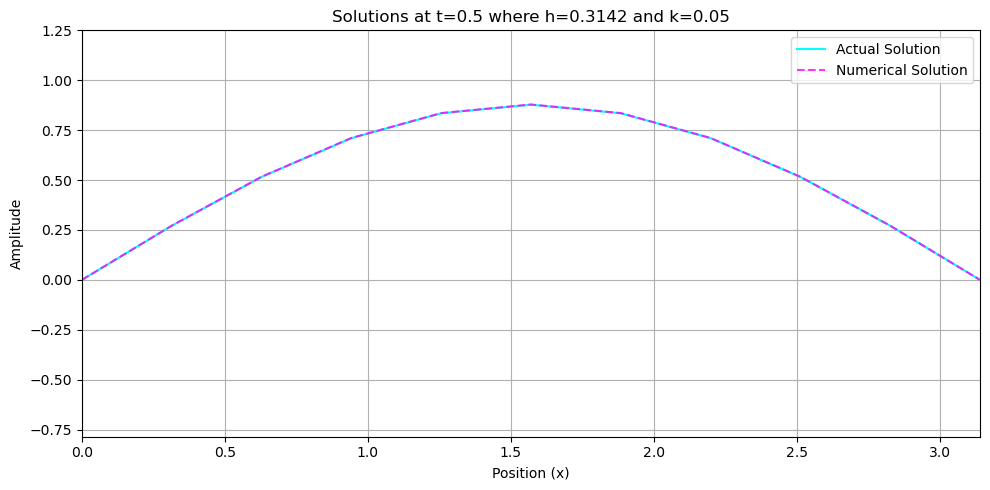


For h=0.157080 and k=0.1:



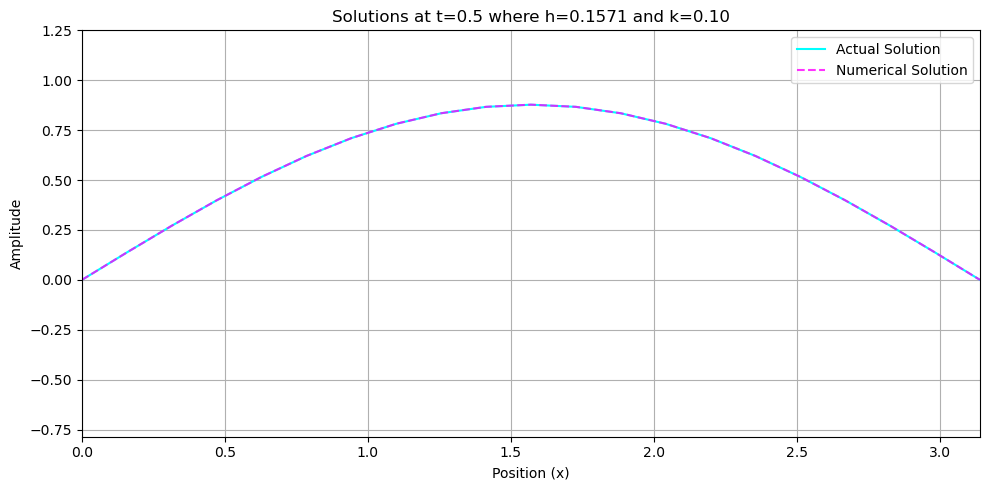


For h=0.157080 and k=0.05:



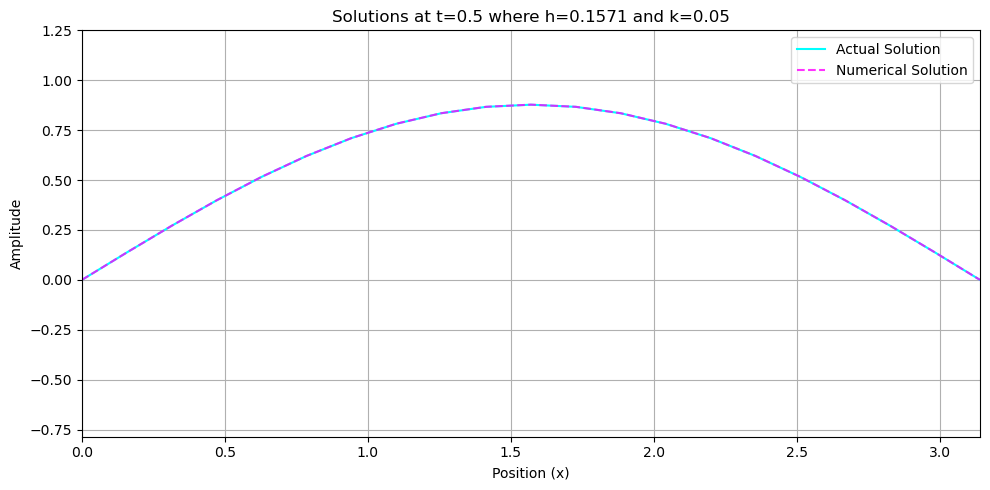

In [215]:
## APPROXIMATE THE SOLUTION TO THE WAVE EQUATION (HYPERBOLIC PDE) using Algorithm 12.4 (Finite-Difference)
def wave_solver(L, T, alpha, m, N, f, g):

    # Step 1: Set h, k, λ²
    h = L / m                        # △x = l/m
    k = T / N                        # △t = T/N
    lam2 = (alpha * k / h)**2        # λ = k*α/h
    x = np.linspace(0, L, m+1)       # spatial mesh
    t = np.linspace(0, T, N+1)       # temporal mesh
    u = np.zeros((m+1, N+1))    # initialize solution matrix

    # Step 2: Set boundary conditions
    u[0,:] = u[-1,:] = 0        # boundaries for all times (t)

    # Step 3: Set initial conditions
    u[:,0] = f(x)           # initial condition for f(x)
    for i in range(1, m):  # initialize boundaries for t
        u[i,1] = (1-lam2)*f(i*h) + (lam2/2)*(f((i+1)*h) + f((i-1)*h)) + k*g(i*h)

    # Step 4: Initialize time constraints
    for j in range(1, N):
        for i in range(1, m):   # tri-diagonal matrix multiplication
            u[i,j+1] = 2*(1-lam2)*u[i,j] + (lam2)*(u[i+1,j] + u[i-1,j]) - u[i,j-1]

    # Output the results
    u_actual = np.zeros((m+1, N+1))
    for j in range(N+1):
        t = j*k
        for i in range(m+1):
            x = i*h
            u_actual[i,j] = f_actual(x,t)

            # Compare numerical vs analytical solution at t=0.5
            u_diff = np.abs(f_actual(x,t) - u[i,j]) / ((f_actual(x,t) + u[i,j]) / 2) if np.abs(f_actual(x,t) + u[i,j]) > 1e-14 else 0
            if ((j % 5 == 0) and (i % 2 == 0)) and (j > 0 and i > 0) and t == 0.5 and u_diff != 0:
                print('{:3}'.format(i),'{:5}'.format(j),'{:12.7f}'.format(x),'{:8}'.format(t),
                      '{:17.7f}'.format(u[i,j]),'{:20.7f}'.format(f_actual(x,t)),'{:17.7f}'.format(u_diff))
    
    return u, u_actual

# Function Definitions
def f(x): return np.sin(x)
def g(x): return 0                             # initial velocity = 0
def f_actual(x,t): return np.cos(t)*np.sin(x)  # actual solution

# Plotting function
def plot_wave_solution(wave_num, wave_act, hh, kk, T):
    Nx = wave_num.shape[0]
    xx = np.linspace(0, L, Nx)
    plt.figure(figsize=(10, 5))
    plt.plot(xx, wave_act[:, -1], label='Actual Solution', color='cyan', linestyle='-')
    plt.plot(xx, wave_num[:, -1], label='Numerical Solution', color='magenta', alpha=0.8, linestyle='--')
    plt.title(f"Solutions at t={T} where h={hh:.4f} and k={kk:.2f}")
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude")
    plt.xlim(0,np.pi)
    plt.ylim(-np.pi/4, 5/4)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show();



## PROBLEM PARAMETERS
T = 0.5             # 0 < t < T  (max time)
L = np.pi           # 0 < x < L  (string length)
alpha = 1           # wave coefficient α² = 1  (speed)
hh = [np.pi/10, np.pi/20, np.pi/20]   # △x = l/m
kk = [0.05, 0.1, 0.05]                # △t = T/N
grid_settings = [(hi,ki) for hi,ki in zip(hh,kk)]



## ANSWER THE QUESTION
print("\n**********************************************************************************************")
print('\n\tComparing our results at t=0.5 to the actual solution u(x,t) = cos(t)*sin(x)....\n')
print("**********************************************************************************************")
wave_plots = list()
for hi, ki in grid_settings:
    m = int(L / hi)  # spatial steps
    N = int(T / ki)  # time steps
    print(f'\nFor h={hi:4f} and k={ki}:\n')
    print("  i  |  j  |    x_i    |    t_j    | Numerical Solution | Actual Solution | Percent Difference")
    print("-----------------------------------------------------------------------------------------------")
    # wave_num, wave_act = wave_solver(hi, ki, T, L)
    wave_num, wave_act = wave_solver(L, T, alpha, m, N, f, g)
    wave_plots.append((wave_num, wave_act, hi, ki))

print("\n\n")
for plot, (wave_num, wave_act, hi, ki) in enumerate(wave_plots):
    print(f'\nFor h={hi:4f} and k={ki}:\n')
    plot_wave_solution(wave_num, wave_act, hi, ki, T)

In [218]:
## APPROXIMATE THE SOLUTION TO THE WAVE EQUATION (HYPERBOLIC PDE) using Algorithm 12.4 (Finite-Difference)
# Variable Parameters
T = 0.5                              # 0 < t < T
L = np.pi                            # 0 < x < L
h = [np.pi/10, np.pi/20, np.pi/20]   # △x = l/m
k = [0.05, 0.1, 0.05]                # △t = T/N

# Fixed Parameters
x0, xf = 0, np.pi   # boundary conditions for x
t0 = 0              # initial value for t
alpha = 1           # wave coefficient α² = 1

def wave_solver2(h, k, T, L):
    # Grid space
    Lx, Lt = (xf-x0)/h, (T-t0)/k
    Nx, Nt = int(Lx)+1, int(Lt)+1
    x = np.linspace(-Lx, Lx, Nx)
    t = np.linspace(-Lt, Lt, Nt)
    lam2 = (alpha * k / h)**2        # λ = k*α/h
    
    # Function Definitions
    def f_actual(x,t): return np.cos(t)*np.sin(x)
    def f(x): return np.sin(x)
    def g(x): return 0
    
    # Algorithm 12.4 (Wave Equation Finite-Difference)
    u = np.zeros((Nx, Nt))  # initialize solution matrix
    u[0,1:] = u[-1,1:] = 0  # boundaries for x
    u[0,0] = f(0)           # lower boundary for f(x)
    u[-1,0] = f(L)          # upper boundary for f(x)
    for i in range(1, Nx):  # initialize boundaries for t
        u[i,0] = f(i*h)
        u[i,1] = (1-lam2)*f(i*h) + (lam2/2)*(f((i+1)*h) + f((i-1)*h)) + k*g(i*h)
    for j in range(1, Nt-1):
        for i in range(1, Nx-1):   # tri-diagonal matrix multiplication
            u[i,j+1] = 2*(1-lam2)*u[i,j] + (lam2)*(u[i+1,j] + u[i-1,j]) - u[i,j-1]

    # Output the results
    u_numerical, u_actual = list(), list()  # to compare FDM vs actual
    for j in range(Nt):
        t = j*k
        for i in range(Nx):
            x = i*h
            u_numerical.append(u[i,j])
            u_actual.append(f_actual(x,t))
            u_diff = np.abs(f_actual(x,t) - u[i,j]) / ((f_actual(x,t) + u[i,j]) / 2) if np.abs(f_actual(x,t) + u[i,j]) > 1e-14 else 0
            if ((j % 5 == 0) and (i % 2 == 0)) and (j > 0 and i > 0) and u_diff != 0:
                print('{:3}'.format(i),'{:5}'.format(j),'{:12.7f}'.format(x),'{:8}'.format(t),
                      '{:17.7f}'.format(u[i,j]),'{:20.7f}'.format(f_actual(x,t)),'{:17.7f}'.format(u_diff))
                # print(i, j, x, t, u[i,j], f_actual(x,t))
    return u_numerical, u_actual

wave_plots2 = list()
for hi, ki in zip(h, k):
    print(f'\nFor h={hi:4f} and k={ki}:\n')
    print("  i  |  j  |    x_i    |    t_j    | Numerical Solution | Actual Solution | Percent Difference")
    print("-----------------------------------------------------------------------------------------------")
    wave_num2, wave_act2 = wave_solver2(hi, ki, T, L)
    wave_plots2.append((wave_num2, wave_act2))


For h=0.314159 and k=0.05:

  i  |  j  |    x_i    |    t_j    | Numerical Solution | Actual Solution | Percent Difference
-----------------------------------------------------------------------------------------------
  2     5    0.6283185     0.25         0.5696577            0.5695124         0.0002551
  4     5    1.2566371     0.25         0.9217256            0.9214905         0.0002551
  6     5    1.8849556     0.25         0.9217256            0.9214905         0.0002551
  8     5    2.5132741     0.25         0.5696577            0.5695124         0.0002551
  2    10    0.6283185      0.5         0.5163933            0.5158301         0.0010912
  4    10    1.2566371      0.5         0.8355419            0.8346306         0.0010912
  6    10    1.8849556      0.5         0.8355419            0.8346306         0.0010912
  8    10    2.5132741      0.5         0.5163933            0.5158301         0.0010912

For h=0.157080 and k=0.1:

  i  |  j  |    x_i    |    t_j    | Num


For h=0.314159 and k=0.05:



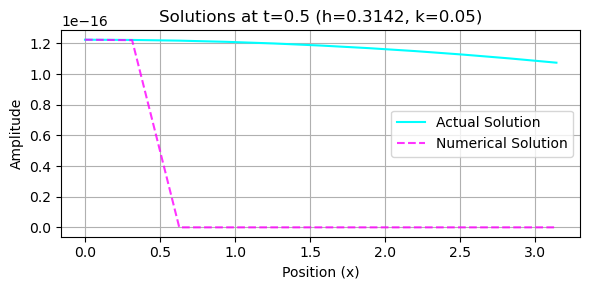


For h=0.157080 and k=0.1:



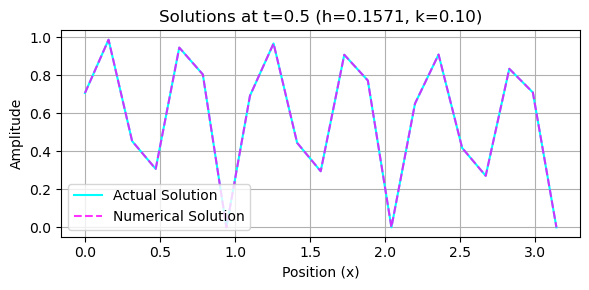


For h=0.157080 and k=0.05:



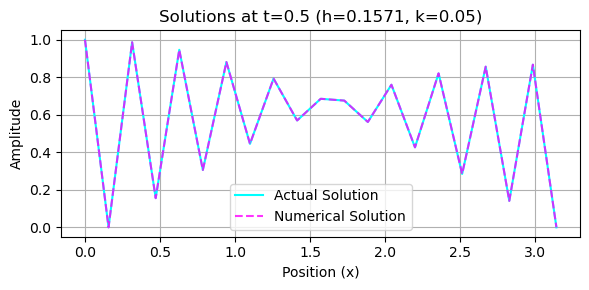

In [219]:
# Plotting
def plot_angle(wave_num2, wave_act2, h, k, T, L):
    Lx = (xf-x0)/h
    Nx = int(Lx)+1
    x = np.linspace(0, L, Nx)
    plt.figure(figsize=(6, 3))
    plt.plot(x, np.array(wave_act2).reshape(Nx, -1)[:,-1], label='Actual Solution', color='cyan', linestyle='-')
    plt.plot(x, np.array(wave_num2).reshape(Nx, -1)[:,-1], label='Numerical Solution', color='magenta', alpha=0.8, linestyle='--')
    plt.title(f"Solutions at t=0.5 (h={h:.4f}, k={k:.2f})")
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show();

for plot, (hi, ki) in enumerate(zip(h, k)):
    print(f'\nFor h={hi:4f} and k={ki}:\n')
    plot_angle(wave_plots2[plot][0], wave_plots2[plot][1], hi, ki, T, L)

<center><hr style="width: 50%; border-color: black;"></center><br>

This problem was a lot of fun! We were able to see how truly simple and how powerful the Finite-Difference Algorithm is by observing its performance on a relatively complex problem (maybe not so complex, since we only have 2 variables). The wave equation provides a potentially infinite volatility due to its macro-to-microcosmic amplitudinal shape. The frequency of the wave gives numerical approximations plenty of chances to diverge. For this reason, we see that the largest `h`, even with a small `k`, shows the largest difference between our Finite-Difference Algorithm and the Actual Solution, and the potential divergence is evident in our first plot. Using the same time parameter at $t = 0.5$, we had more success with spatially smaller increments of `h`, while the difference in `k` demonstrated little effect on volatility. This is a beautiful approach to an initial value problem! We can take confidence in this approach for nearly any number of $t$ to converge to the solution and optimize computational expense by maintaining a sensitive spatial parameter `h`.
<center><hr style="width: 50%; border-color: black;"></center><br>

---  
--- 

<center><h2>Analysis</h2></center><br><br>

I'm just going to summarize what I've (saying "we've" to mimic textbook semantics, as if you're walking through my assignment with me) learned throughout this unit & incidentally, the course. Since I've made so much commentary throughout my assignments, I'm going to do my best to generalize the maths (avoid proofs) for the sake of this summary. 

I'm approaching this from the perspective of a graduating senior in data science.

Data is how we identify things; often it's already numerical (measurements) but it can be whatever identifier we use to distinguish anything (colors, etc). There's variability in our identification mechanisms (moreso if humans are tasked with the job). As data scientists, we're tasked with statistical analysis: pattern-finding in the data in order to extract intelligible, actionable meaning between features (variables: columns). All features are given numerical representation and normalized to express magnitude (strength) and direction (negatives, positives) in order to describe each variable's relationship with each data point (sample, observation: row). It can be said that the real difficulty of proper analysis arises from the bipartite network of variability between the data points as recorded (the identification mechanism) and the variability between the features as identifiers (correlation and covariance). If those aren't enough to pose relationship challenges to the data scientist, then consider the probability (see what I did there?) of context: the subjective problem arising from calling it all data in the first place. It sounds trite until you pick up the magnifying glass, so let me walk you through that. Before we dive in, consider the semantics: as the nature of historical context properly informs interpretation of a historical event and its often-partnered literary context uses some sort of mechanism to deliver a message, we're looking at numerical context. As all of the historical, artistic, and literary works in human history contain inherent bias due to their <i>relative</i> contexts, our computational mechanisms are quite literally (ha!) no different. Discretization poses issues. Language does it at the macro level, and mathematics- the universal language that canonizes relationships between practically everything- does it at a micro level. Back to the data. Remember, now it's all in numerical form. So begin with that image: a spreadsheet (samples x features).

The grid of numbers formed by these relationships are coefficients of a matrix. Their principle values in the data are described by their relative strengths. By utilizing matrix decomposition techniques, we can find the eigenvalues and their relative eigenvectors to describe each independent variable's relative importance, given its fellow features, to the entire grid- a closed circuit of statistical relationships. We've explored just a handful of factorization and decomposition methods to explore the best way to identify these values. 
----------Linear Alg stuff-------------

Now for the really fun stuff!

When we're confronted with complex relationships (like what we do with more powerful algorithms like neural networks), we run into computational expense. The nature of complex relationships requires additional dimensionality to define equation variables- which is why reducing correlated variables is so helpful to begin with. 

Central Difference Approximation (converging on a root by averaging their incremental differences)
Discrete Laplace Equation (solve interior Phi values given boundary) central differences of central x diff ~ central y diff (~ why 2nd order derivative)
Natural Ordering // Gaussian Elimination to get A * phi = b to extract phi values by setting A * phi - b = 0 by direct solution
Jacobian ~ Gauss-Seidel ~ SOR to iterate to the solution of A * phi = b by convergence (SOR introduces lambda to control relaxation, allows stability of alg so it doesn't "blow up" w/ Jacobian)
red-black ordering uses surrounding Phi values to update intermediate Phi values: forward & backward differences
in code: iteration using SOR, using Laplacian discretization equations
explicit methods to solve diffusion equation u = u(x,t) → delta u / delta t = D delta^2 u / delta x^2 → boundary conditions u(-Lx,t)=u & u(Lx,t) = 0 at initial conditions u(x,0)=u_0(x) makes a delta-x by delta-t grid space where t has starting bound and x has range but t is infinite... spatial dimension is j for x and time dimension is l for time so we have u(x_j, t_l) = u_j^l
forward time centered space FTCS is j x l space so that in order to get from j,l to discretize du/dt we use central diff approx to get from j,l to j,l+1 and for time we use euler's method j,l → j+1,l since time only has initial value: is to say frac{u_j^l+1 - u_j^l}{delta t} = D * {u_j-1^l - 2*u_j^l + u_j+1^l}{(delta x)^2} gives final for any next time step l we get u_j^l+l = u_j^l + D*delta-t/(delta-x)^2 * (u_j+1^l - 2*u_j^l + u_j-1^l) but depends on width of time step b/c else it blows up with time (diverges)... so Von Neumann stability analysis which is u_j^l = kasai^l * e^(i*k*j*delta-x) where kasai's 'l' is raised to the power of 'l' and 'i' is e raised to the power of 'i' so that this translates to norm of kasai > 1 for any wave-number k indicates the scheme is unstable ... this is a fourier transform, using an explicit iterative method as forward difference in relation to time 'l' where algebraic reduction gives us kasai = 1 + (delta-t * D / (delta-x)^2) * (e^(i*k*delta-x) - 2 + e^(-i*k*delta-x)) and when using identity e^(i*k*delta-x) + e^(-i*k*delta-x) == 2 cos (k delta-x) we get kasai = 1 + (2 delta-t D / (delta-x)^2) (cos(k delta-x_ - 1) and since cos exists btwn -1 and 1, then k is most dangerous to diverge when cos(k delta-x) = -1, so we need to know when will kasai drop below -1? ... so in our diffusion equation, for example, analytically is wherever delta-t > (delta-x)^2 / 2*D (where D is the diffusion constant) then the scheme is unstable and will diverge (i.e. whenever kasai < -1), therefore the Forward-Difference method is considered <i>conditionally stable</i>; convergencee happens at the rate of O(k+h^2) only if alpha^2 * k/h^2 \leq 1/2
we can use the VN stability analysis to get an unconditionally stable solution using implicit method of differentiation by setting next iteration of time l+1 in juxtaposition (central diff) to space u_i^l+1 by setting to u_j^l+1 = u_j^l + delta-t * D / (delta-x)^2 * (u_j+1^l+1 - 2 u_j^l+1 + u_j-1^l+1)